# MNIST with Tensorflow

## MNIST Dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#tf.keras.backend.set_floatx('float64')

In [4]:
tf.keras.backend.floatx()

'float32'

In [5]:
# The MNIST dataset is integrated into tensorflow keras
# MNIST contains images of handwritten digits (0--9) with labels
# MNIST is split into 60k images for training and 10k for testing (validation)
# x: images (inputs)
# y: labels (correct outputs)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

60000 60000
10000 10000


In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

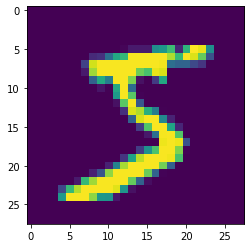

In [6]:
plt.imshow(x_train[0])

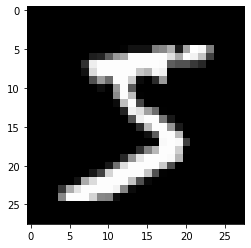

In [7]:
plt.imshow(x_train[0], cmap='gray')

In [9]:
print(y_train[0])

5


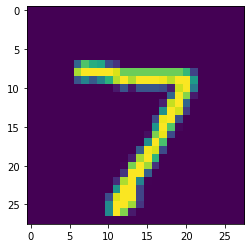

In [10]:
plt.imshow(x_test[0])

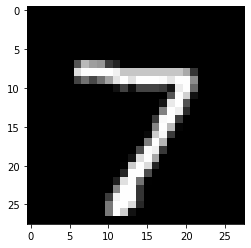

In [11]:
plt.imshow(x_test[0], cmap='gray')

In [12]:
print(y_test[0])

7


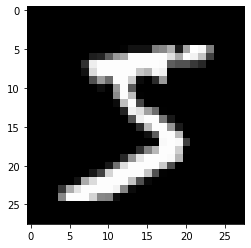

In [13]:
plt.imshow(x_train[0], cmap='gray')

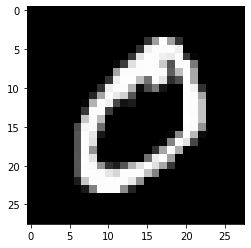

In [14]:
plt.imshow(x_train[1], cmap='gray')

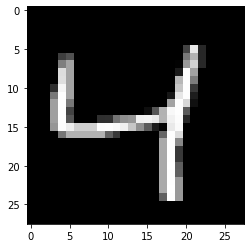

In [15]:
plt.imshow(x_train[2], cmap='gray')

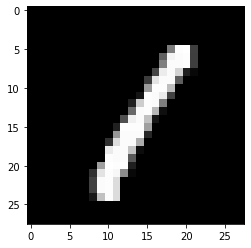

In [16]:
plt.imshow(x_train[3], cmap='gray')

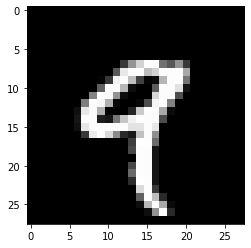

In [17]:
plt.imshow(x_train[4], cmap='gray')

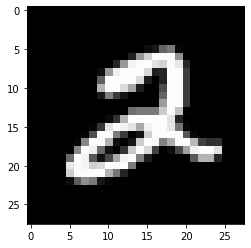

In [18]:
plt.imshow(x_train[5], cmap='gray')

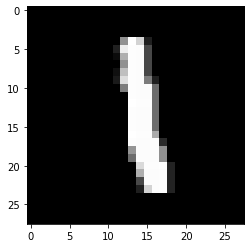

In [19]:
plt.imshow(x_train[6], cmap='gray')

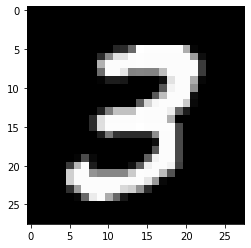

In [20]:
plt.imshow(x_train[7], cmap='gray')

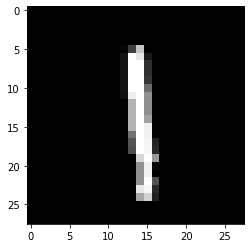

In [21]:
plt.imshow(x_train[8], cmap='gray')

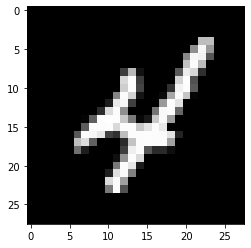

In [22]:
plt.imshow(x_train[9], cmap='gray')

## Building CNN

In [23]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import Model

In [24]:
# Conv2D(filters, kernel_size, activation): outputs smaller images (filters) for each input image
# Skip MaxPool2D(): skip max pool layer for this simple example; max pool is typically used for larger more complex images
# Flatten(): input matrix (2D array) and output vector (1D array)
# Dense(units, activation): hidden neural network layer, units are neurons

In [25]:
# one-hot encoding: array of "0s" with only one "1" present
# each entry corresponds to one of the categories, in this case the digits 0--9
# example for the digit 3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
#
# softmax normalizes values to add up to 1 and to be in the interval [0, 1]
# after applying softmax, values correspond to probabilities for each category

## CNN Model

In [26]:
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = Conv2D(filters=32, kernel_size=3, activation='relu')
        self.flatten = Flatten()
        self.dense1 = Dense(units=128, activation='relu')
        self.dense2 = Dense(units=10,  activation='softmax')
        
    def __call__(self, x):
        x1 = self.conv1(x)
        x2 = self.flatten(x1)
        x3 = self.dense1(x2)
        x4 = self.dense2(x3)
        return x4

In [27]:
model = MNISTModel()

In [28]:
# loss example
#y_true = [1, 2]
#y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
#scce = tf.keras.losses.SparseCategoricalCrossentropy()
#scce(y_true, y_pred).numpy()

In [29]:
# optimize example
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
var1 = tf.Variable(10.0)
loss1 = lambda: (var1 ** 2)/2.0       # d(loss)/d(var1) == var1
step_count = opt.minimize(loss1, [var1]).numpy()
# The first step is `-learning_rate*sign(grad)`
var1.numpy()

9.9

## Define Loss, Optimize, Train, and Test Functions

In [30]:
# SparseCategoricalCrossentropy() should be used as the loss function for labeled classes using one-hot representation
# Adam() automatically adjusts the learning rate to be larger or smaller as needed
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer     = tf.keras.optimizers.Adam()

In [31]:
# get average loss
# get accuracy: SparseCategoricalAccuracy() corresponds to SparseCategoricalCrossentropy()
train_loss     = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss      = tf.keras.metrics.Mean(name='test_loss')
test_accuracy  = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [32]:
@tf.function
def train_step(inputs, outputs):
    with tf.GradientTape() as gt:
        predictions = model(inputs)
        loss = loss_function(outputs, predictions)
    # trainable variables: all weights and biases from all nodes in all layers
    # gradients: derivatives with respect to all internal model parameters
    # gradients are applied in the optimizer to minimize the loss
    gradients = gt.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    # check current loss and accuracy by comparing predictions with outputs
    train_loss(loss)
    train_accuracy(outputs, predictions)

In [33]:
@tf.function
def test_step(inputs, outputs):
    predictions = model(inputs)
    loss = loss_function(outputs, predictions)
    # check current loss and accuracy by comparing predictions with outputs
    test_loss(loss)
    test_accuracy(outputs, predictions)

## Reformat Dataset

In [10]:
# Initialize data at starting point to avoid reapplying changes when rerunning this cell
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# cast data as float32 (currently is float64)
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)
x_test  = tf.cast(x_test,  tf.float32)
y_test  = tf.cast(y_test,  tf.float32)
# Normalize pixel values [0--255] to be in the range [0--1]
x_train, x_test = x_train/255.0, x_test/255.0
# add axis so that each pixel is an array
x_train = x_train[..., tf.newaxis]
x_test  = x_test[...,  tf.newaxis]

In [11]:
print(x_train[0])

tf.Tensor(
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.     

In [36]:
# shuffle data randomly to avoid overfitting; mix inputs
# shuffle 10k at a time and put into batches of 32
# each batch is a small chunk of data; it is better to use batches for large datasets
# the loss is calculated and parameters are adjusted after each batch
# it would take a long time to calculate the loss over the entire dataset
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
# do not need to shuffle test data, as no training or parameter tuning occurs during testing
# still use batches for test data instead of calculating loss over full dataset
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [37]:
# print format examples
var1, var2 = 1, 2
print(f"var1: {var1}, var2: {var2}")
print("var1: {0}, var2: {1}".format(var1, var2))
print("var1: {}, var2: {}".format(var1, var2))
print("var1: ", var1, ", var2: ", var2)

var1: 1, var2: 2
var1: 1, var2: 2
var1: 1, var2: 2
var1:  1 , var2:  2


## Run Training and Testing

In [38]:
def run(epochs):
    for epoch in range(epochs):
        # training loop: loop over all training data (all batches)
        for train_inputs, train_labels in train_data:
            train_step(train_inputs, train_labels)
        # testing loop: loop over all testing data (all batches)
        for test_inputs, test_labels in test_data:
            test_step(test_inputs, test_labels)
        # print results
        template = 'epoch: {}, train loss: {}, train accuracy: {}, test loss: {}, test accuracy: {}'
        print(template.format(
            epoch + 1,
            train_loss.result(),
            train_accuracy.result(),
            test_loss.result(),
            test_accuracy.result()
        ))
        # reset states
        train_loss.reset_states()
        train_accuracy.reset_states()
        test_loss.reset_states()
        test_accuracy.reset_states()

## Put all code into one cell to run without kernel crashing

For 5 epochs, this takes a little over 10 minutes to run.

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import Model

# --- Loading and formatting data --- #

# The MNIST dataset is integrated into tensorflow keras
# MNIST contains images of handwritten digits (0--9) with labels
# MNIST is split into 60k images for training and 10k for testing (validation)
# x: images (inputs)
# y: labels (correct outputs)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# cast data as float32 (currently is float64)
x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)
x_test  = tf.cast(x_test,  tf.float32)
y_test  = tf.cast(y_test,  tf.float32)
# Normalize pixel values [0--255] to be in the range [0--1]
x_train, x_test = x_train/255.0, x_test/255.0
# add axis so that each pixel is an array
x_train = x_train[..., tf.newaxis]
x_test  = x_test[...,  tf.newaxis]

# shuffle data randomly to avoid overfitting; mix inputs
# shuffle 10k at a time and put into batches of 32
# each batch is a small chunk of data; it is better to use batches for large datasets
# the loss is calculated and parameters are adjusted after each batch
# it would take a long time to calculate the loss over the entire dataset
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
# do not need to shuffle test data, as no training or parameter tuning occurs during testing
# still use batches for test data instead of calculating loss over full dataset
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# --- CNN Model --- #

# Conv2D(filters, kernel_size, activation): outputs smaller images (filters) for each input image
# Skip MaxPool2D(): skip max pool layer for this simple example; max pool is typically used for larger more complex images
# Flatten(): input matrix (2D array) and output vector (1D array)
# Dense(units, activation): hidden neural network layer, units are neurons

# one-hot encoding: array of "0s" with only one "1" present
# each entry corresponds to one of the categories, in this case the digits 0--9
# example for the digit 3: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
#
# softmax normalizes values to add up to 1 and to be in the interval [0, 1]
# after applying softmax, values correspond to probabilities for each category

class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = Conv2D(filters=32, kernel_size=3, activation='relu')
        self.flatten = Flatten()
        self.dense1 = Dense(units=128, activation='relu')
        self.dense2 = Dense(units=10,  activation='softmax')
        
    def __call__(self, x):
        x1 = self.conv1(x)
        x2 = self.flatten(x1)
        x3 = self.dense1(x2)
        x4 = self.dense2(x3)
        return x4

model = MNISTModel()

# SparseCategoricalCrossentropy() should be used as the loss function for labeled classes using one-hot representation
# Adam() automatically adjusts the learning rate to be larger or smaller as needed
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer     = tf.keras.optimizers.Adam()

# get average loss
# get accuracy: SparseCategoricalAccuracy() corresponds to SparseCategoricalCrossentropy()
train_loss     = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss      = tf.keras.metrics.Mean(name='test_loss')
test_accuracy  = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(inputs, outputs):
    with tf.GradientTape() as gt:
        predictions = model(inputs)
        loss = loss_function(outputs, predictions)
    # trainable variables: all weights and biases from all nodes in all layers
    # gradients: derivatives with respect to all internal model parameters
    # gradients are applied in the optimizer to minimize the loss
    gradients = gt.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    # check current loss and accuracy by comparing predictions with outputs
    train_loss(loss)
    train_accuracy(outputs, predictions)

@tf.function
def test_step(inputs, outputs):
    predictions = model(inputs)
    loss = loss_function(outputs, predictions)
    # check current loss and accuracy by comparing predictions with outputs
    test_loss(loss)
    test_accuracy(outputs, predictions)

def run(epochs):
    for epoch in range(epochs):
        # training loop: loop over all training data (all batches)
        for train_inputs, train_labels in train_data:
            train_step(train_inputs, train_labels)
        # testing loop: loop over all testing data (all batches)
        for test_inputs, test_labels in test_data:
            test_step(test_inputs, test_labels)
        # print results
        template = 'epoch: {}, train loss: {}, train accuracy: {}, test loss: {}, test accuracy: {}'
        print(template.format(
            epoch + 1,
            train_loss.result(),
            train_accuracy.result(),
            test_loss.result(),
            test_accuracy.result()
        ))
        # reset states
        train_loss.reset_states()
        train_accuracy.reset_states()
        test_loss.reset_states()
        test_accuracy.reset_states()
        
epochs = 5
run(epochs)

epoch: 1, train loss: 0.13767516613006592, train accuracy: 0.9590666890144348, test loss: 0.06245213374495506, test accuracy: 0.9793999791145325
epoch: 2, train loss: 0.04175660014152527, train accuracy: 0.9869333505630493, test loss: 0.048051975667476654, test accuracy: 0.9847999811172485
epoch: 3, train loss: 0.021129680797457695, train accuracy: 0.9930166602134705, test loss: 0.05340108647942543, test accuracy: 0.9839000105857849
epoch: 4, train loss: 0.012818052433431149, train accuracy: 0.9958833456039429, test loss: 0.049947164952754974, test accuracy: 0.9846000075340271
epoch: 5, train loss: 0.009372918866574764, train accuracy: 0.9967833161354065, test loss: 0.05977676436305046, test accuracy: 0.9842000007629395
